In [3]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py
import torch

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

# WatChMaL imports
from io_utils.data_handling import WCH5Dataset

# Use the dataloader to load the dataset

In [6]:
dset=WCH5Dataset("/fast_scratch/WatChMaL/data/IWCDmPMT/varyE/IWCDmPMT_varyE_100-1000MeV_300k_fmt.h5",
                      0.1,
                      0.1,
                      shuffle=True,
                      reduced_dataset_size=50000)

In [7]:
event_data = [data[0] for data in iter(dset)]

In [10]:
event_data = np.array(event_data)
print(event_data.shape)

(900000, 16, 40, 38)


In [27]:
data = event_data[:50]
print(data.shape)

(50, 16, 40, 38)


In [28]:
charge_data = data[:,:,:,:19]
timing_data = data[:,:,:,19:]

print(charge_data.shape)
print(timing_data.shape)

(50, 16, 40, 19)
(50, 16, 40, 19)


In [29]:
single_event_charge_data = charge_data[10]
single_event_timing_data = timing_data[10]

print(single_event_charge_data.shape)
print(single_event_timing_data.shape)

# Reshape the arrays into 1D
charge_data = charge_data.reshape(charge_data.shape[0]*charge_data.shape[1]*charge_data.shape[2]*charge_data.shape[3], -1)
timing_data = timing_data.reshape(timing_data.shape[0]*timing_data.shape[1]*timing_data.shape[2]*timing_data.shape[3], -1)

single_event_charge_data = single_event_charge_data.reshape(single_event_charge_data.shape[0]*single_event_charge_data.shape[1]*single_event_charge_data.shape[2], -1)
single_event_timing_data = single_event_timing_data.reshape(single_event_timing_data.shape[0]*single_event_timing_data.shape[1]*single_event_timing_data.shape[2], -1)

(16, 40, 19)
(16, 40, 19)


In [30]:
print(charge_data.shape)
print(timing_data.shape)

(608000, 1)
(608000, 1)


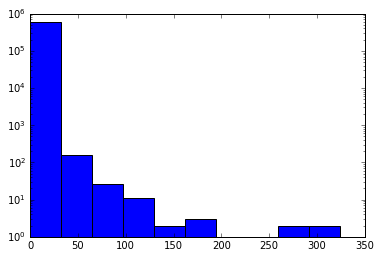

In [32]:
plt.hist(charge_data)
plt.yscale('log')

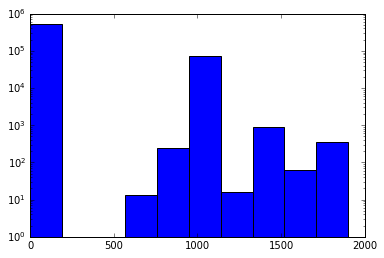

In [33]:
plt.hist(timing_data)
plt.yscale('log')

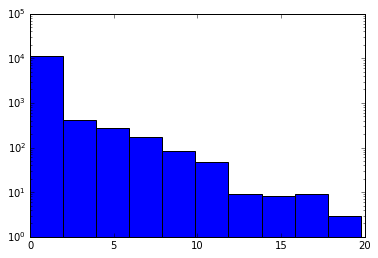

In [34]:
plt.hist(single_event_charge_data)
plt.yscale('log')

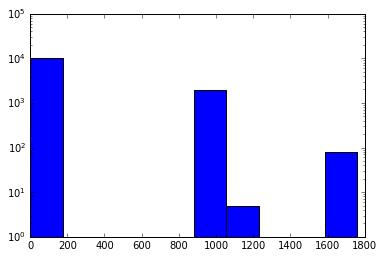

In [35]:
plt.hist(single_event_timing_data)
plt.yscale('log')